# Praca domowa nr 8

- Dane to tej pracy domowej to lista top 5000 albumów muzycznych wg portalu [rateyourmusic.com](https://rateyourmusic.com). Dataset wraz z opisem można znaleźć na [Kaggle'u](https://www.kaggle.com/datasets/michaelbryantds/top-5000-albums-of-all-time-rateyourmusiccom). 
- Dane znajdują się też w katalogu z pracą domową - nazwa pliku to `rym_top5000.csv`.  

## Zadanie 1 - `numpy` + `pandas` (2 pkt)
Używając funkcji z pakietów `numpy` oraz `pandas` odpowiedz na poniższe pytania dotyczące zbioru danych o albumach muzycznych.

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("rym_top5000.csv", decimal = ".")

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
df['Number of Ratings']=df['Number of Ratings'].str.replace(',','').astype(int)
df.head()

,Ranking,Album,Artist Name,Release Date,Genres,Descriptors,Average Rating,Number of Ratings,Number of Reviews
0,1.0,OK Computer,Radiohead,16 June 1997,"Alternative Rock, Art Rock","melancholic, anxious, futuristic, alienation, ...",4.23,70382,1531
1,2.0,Wish You Were Here,Pink Floyd,12 September 1975,"Progressive Rock, Art Rock","melancholic, atmospheric, progressive, male vo...",4.29,48662,983
2,3.0,In the Court of the Crimson King,King Crimson,10 October 1969,"Progressive Rock, Art Rock","fantasy, epic, progressive, philosophical, com...",4.30,44943,870
3,4.0,Kid A,Radiohead,3 October 2000,"Art Rock, Experimental Rock, Electronic","cold, melancholic, futuristic, atmospheric, an...",4.21,58590,734
4,5.0,To Pimp a Butterfly,Kendrick Lamar,15 March 2015,"Conscious Hip Hop, West Coast Hip Hop, Jazz Rap","political, conscious, poetic, protest, concept...",4.27,44206,379


In [6]:
df.head()

,Ranking,Album,Artist Name,Release Date,Genres,Descriptors,Average Rating,Number of Ratings,Number of Reviews
0,1.0,OK Computer,Radiohead,16 June 1997,"Alternative Rock, Art Rock","melancholic, anxious, futuristic, alienation, ...",4.23,70382,1531
1,2.0,Wish You Were Here,Pink Floyd,12 September 1975,"Progressive Rock, Art Rock","melancholic, atmospheric, progressive, male vo...",4.29,48662,983
2,3.0,In the Court of the Crimson King,King Crimson,10 October 1969,"Progressive Rock, Art Rock","fantasy, epic, progressive, philosophical, com...",4.30,44943,870
3,4.0,Kid A,Radiohead,3 October 2000,"Art Rock, Experimental Rock, Electronic","cold, melancholic, futuristic, atmospheric, an...",4.21,58590,734
4,5.0,To Pimp a Butterfly,Kendrick Lamar,15 March 2015,"Conscious Hip Hop, West Coast Hip Hop, Jazz Rap","political, conscious, poetic, protest, concept...",4.27,44206,379


#### Jacy artyści z ponad 5 albumami na liście mają największą medianę ocen dla swoich albumów? Podaj top 10.

In [7]:
# Grupowanie danych po artystach i liczenie mediany ocen dla każdego artysty
artist_medians = df.groupby('Artist Name')['Average Rating'].agg(['median', 'count'])

# Wybieranie artystów z co najmniej 5 albumami na liście
artist_counts = artist_medians[artist_medians['count'] > 5]

# sortowanie po medianie i wybór top 10
top_10 = artist_counts.sort_values("median",ascending=False).head(10).reset_index()

top_10[["Artist Name", "median"]]
top_10

,Artist Name,median,count
0,David Bowie,4.050,8
1,The Beatles,4.045,10
2,King Crimson,3.970,7
3,The Rolling Stones,3.965,6
4,Black Sabbath,3.950,8
5,Led Zeppelin,3.940,6
6,Pink Floyd,3.910,8
7,Death,3.905,6
8,John Coltrane,3.905,14
9,Bob Dylan,3.890,11


#### Jacy artyści mają największą różnicę między najgorszym i najlepszym średnim ratingiem dla swojego albumu? Podaj top 10  oraz najwyższą i najniższą ocenę dla każdego z tych artystów. 

In [7]:
min_max_df = df.groupby(by = 'Artist Name').agg({'Average Rating': ['min', 'max']})

min_max_df["difference"] = min_max_df[("Average Rating","max")] - min_max_df[("Average Rating","min")]

sorted = min_max_df.sort_values("difference", ascending=False).iloc[0:10,0:2].reset_index()

sorted


Artist Name Average Rating      
                                  min   max
0       Kendrick Lamar           3.52  4.27
1          The Beatles           3.55  4.25
2           Pink Floyd           3.60  4.29
3  My Bloody Valentine           3.58  4.24
4         King Crimson           3.67  4.30
5        John Coltrane           3.70  4.30
6            Radiohead           3.66  4.23
7          Miles Davis           3.69  4.23
8             The Cure           3.63  4.17
9           Kanye West           3.54  4.07

#### Podaj top 10 albumów o największym stosunku liczby ocen do liczby recenzji. Weź pod uwagę tylko albumy o przynajmniej 5000 ocenach i 15 recenzjach.

In [8]:
albums = df.loc[(df["Number of Ratings"] >= 5000) & (df["Number of Reviews"] >= 15)]

albums["ratio"] = albums["Number of Ratings"] / albums["Number of Reviews"]

albums = albums.sort_values("ratio", ascending=False).reset_index().iloc[0:10,1:]

albums = albums.head(10)

albums[["Album", "ratio"]]




,Album,ratio
0,Jenny Death: The Powers That B Disc 2,361.833333
1,Bury Me at Makeout Creek,308.210526
2,春と修羅 (Haru to Shura),272.913043
3,Saturation,251.842857
4,Saturation III,251.735294
5,Scenery,248.666667
6,Endless,228.487179
7,Imperial,225.420000
8,Saturation II,215.552941
9,Bottomless Pit,202.098039


#### Z których lat pochodzi najwięcej albumów na liście najpopularniejszych wśród krytyków i najpopularniejszych wśród oceniających? 
a) Podaj 5 lat, w których wydano najwięcej albumów z listy mających liczbę recenzji większą niż Q3 (trzeci kwartyl).

b) Podaj 5 lat, w których wydano najwięcej albumów z listy mających liczbę ocen większą niż Q3 (trzeci kwartyl).


In [17]:
albums_a = df.loc[df["Number of Reviews"] > np.percentile(df["Number of Reviews"], 75)]

albums_a["Release Date"] = albums_a["Release Date"].str[-4:] #sam rok z daty wydania

albums_a = albums_a.groupby("Release Date").size().reset_index().rename(columns = {0: "count"}) #groupby i zmiana nazwy kolumny z 0 na n

albums_a = albums_a.sort_values(["count"], ascending= False).reset_index(drop = True).head(5)
albums_a

,Release Date,count
0,1970,43
1,1971,41
2,1969,38
3,1994,36
4,1995,34


In [19]:
albums_b = df.loc[df["Number of Ratings"] > np.percentile(df["Number of Ratings"], 75)]

albums_b["Release Date"] = albums_b["Release Date"].str[-4:]

albums_b = albums_b.groupby("Release Date").size().reset_index().rename(columns = {0: "count"})

albums_b = albums_b.sort_values(["count"], ascending= False).reset_index(drop = True).head(5)
albums_b

,Release Date,count
0,1994,41
1,1971,36
2,1970,35
3,1996,34
4,1995,33


## Zadanie 2 - wizualizacja (3 pkt)
- Za pomocą pakietów `matplotlib` i `seaborn` stwórz dwa wykresy. 
- Wykorzystaj funkcję `matplotlib.pyplot.subplots`, by umieścić je we wspólnej figurze. 
- Jeden z wykresów ma opierać się na wynikach z zadania 1 - wizualizować odpowiedź na wybrane pytanie. 
- Drugi wykres może mieć dowolną tematykę, ale ma być powiązany z wcześniejszym, tak by figura mogła mieć wspólny tytuł.

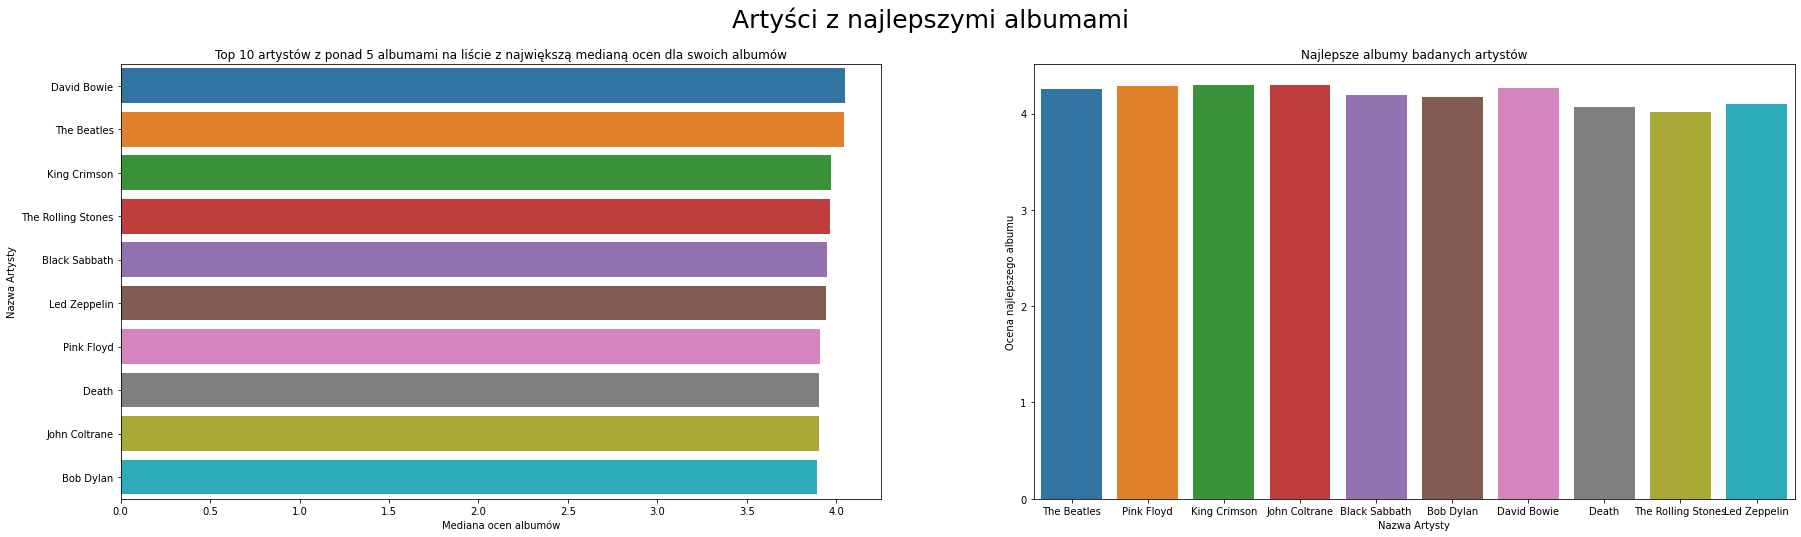

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

artysci = df.groupby("Artist Name").size().reset_index().rename(columns = {0: "n"})
artysci = artysci.loc[artysci["n"] >5,["Artist Name"]]
df1 = pd.merge(df, artysci, how='inner', left_on='Artist Name', right_on='Artist Name')
df1 = df1[["Artist Name","Average Rating"]].groupby("Artist Name").median().reset_index()
df1 = df1.sort_values(["Average Rating"], ascending= False).reset_index(drop = True).head(10)
df1 = df1["Artist Name"]
min_max_df = pd.merge(df1, df, how='inner', left_on='Artist Name', right_on='Artist Name')

min_max_df = min_max_df.groupby(by = 'Artist Name').agg({'Average Rating': ['min', 'max']})

min_max_df["difference"] = min_max_df[("Average Rating","max")] - min_max_df[("Average Rating","min")]

sorted = min_max_df.sort_values("difference", ascending=False).iloc[0:10,0:2].reset_index()
final_df = pd.concat([sorted["Artist Name"], sorted[('Average Rating', 'min')], sorted[('Average Rating', 'max')]], axis = 1)

# Tworzenie danych do pierwszego wykresu
x1 = [1, 2, 3, 4, 5]
y1 = [2, 4, 6, 8, 10]

# Tworzenie danych do drugiego wykresu
x2 = [6, 7, 8, 9, 10]
y2 = [12, 14, 16, 18, 20]

# Tworzenie figur z dwoma wykresami
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 8))

# Tworzenie pierwszego wykresu
sns.barplot(y="Artist Name", x="median", data=top_10, ax = ax1)

ax1.set_title("Top 10 artystów z ponad 5 albumami na liście z największą medianą ocen dla swoich albumów")
ax1.set_xlabel("Mediana ocen albumów")
ax1.set_ylabel("Nazwa Artysty")

# Tworzenie drugiego wykresu
sns.barplot(y=('Average Rating', 'max'), x="Artist Name", ax=ax2, data = final_df)
ax2.set_title("Najlepsze albumy badanych artystów")
ax2.set_xlabel("Nazwa Artysty")
ax2.set_ylabel("Ocena najlepszego albumu")

# Dodanie tytułu dla całej figury
fig.suptitle("Artyści z najlepszymi albumami", fontsize = 25)

plt.show()

## * Zadanie 3 - bonusowe (1 pkt)

Zapisz wygenerowaną figurę do formatu `.pgf` i załącz w raporcie wygenerowanym w `LaTeX` tak, by na wykresie zawierał się klikalny link do strony `www.rateyourmusic.com` (np. w tytule) - można zrobić to ręcznie, edytując zapisany plik `.pgf`. Przykład w katalogu z pracą domową w pliku `pgf_example.pdf` (klikalny tytuł i elementy legendy).  

Załącz w rozwiązaniu wygenerowany plik `pdf`. 